In [1]:

import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt



In [43]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
ROOT_IM = ROOT_DIR[:15]
print(ROOT_DIR)
print(ROOT_IM)

C:\Users\joaqu\mask_RCNN
C:\Users\joaqu\


In [3]:
import warnings
warnings.filterwarnings("ignore")



In [4]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library


In [5]:
from mrcnn import utils


In [6]:
import mrcnn.model as modellib


Using TensorFlow backend.


In [7]:
from mrcnn import visualize

In [28]:
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version


print(sys.path)

['C:\\Users\\joaqu\\mask_RCNN\\samples', 'C:\\Users\\joaqu\\Anaconda3\\python37.zip', 'C:\\Users\\joaqu\\Anaconda3\\DLLs', 'C:\\Users\\joaqu\\Anaconda3\\lib', 'C:\\Users\\joaqu\\Anaconda3', '', 'C:\\Users\\joaqu\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\joaqu\\Anaconda3\\lib\\site-packages', 'c:\\users\\joaqu\\prove-it\\packages', 'C:\\Users\\joaqu\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\joaqu\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\joaqu\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\joaqu\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\joaqu\\.ipython', 'C:\\Users\\joaqu\\mask_RCNN', 'C:\\Users\\joaqu\\mask_RCNN', 'C:\\Users\\joaqu\\mask_RCNN\\samples/coco/', 'C:\\Users\\joaqu', 'C:\\Users\\joaqu\\mask_RCNN\\samples/coco/']


In [9]:
import coco

In [10]:
%matplotlib inline

In [49]:

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_IM, "OneDrive\Desktop\expskl\expskl")
print(os.path)
print(IMAGE_DIR)

<module 'ntpath' from 'C:\\Users\\joaqu\\Anaconda3\\lib\\ntpath.py'>
C:\Users\joaqu\OneDrive\Desktop\expskl\expskl


In [12]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [13]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [54]:
# COCO Class names
# class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
#                'bus', 'train', 'truck', 'boat', 'traffic light',
#                'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
#                'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
#                'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
#                'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
#                'kite', 'baseball bat', 'baseball glove', 'skateboard',
#                'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
#                'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
#                'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
#                'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
#                'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
#                'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
#                'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
#                'teddy bear', 'hair drier', 'toothbrush']

# class_names = ['bench', 'bicycle', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 
#                'elephant', 'fire_hydrant', 'giraffe', 'horse', 'motorcycle',
#                'person', 'sheep', 'traffic_light', 'truck']

class_names = os.listdir(IMAGE_DIR + '\im\.')
print(class_names)

['bench', 'bicycle', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'elephant', 'fire_hydrant', 'giraffe', 'horse', 'motorcycle', 'person', 'sheep', 'traffic_light', 'truck']


In [58]:
im_dir = IMAGE_DIR + '\im'
mask_dir = IMAGE_DIR + '\mask'
skl_dir = IMAGE_DIR + '\skl'


im_files = os.listdir(im_dir + '.')
mask_files = os.listdir(mask_dir + '.')
skl_files = os.listdir(skl_dir + '.')

['bench', 'bicycle', 'boat', 'bus', 'car', 'cat', 'cow', 'dog', 'elephant', 'fire_hydrant', 'giraffe', 'horse', 'motorcycle', 'person', 'sheep', 'traffic_light', 'truck']


In [69]:
num_training = [784, 1016, 700, 660, 759, 2364, 452,
                1871, 95, 923, 892, 71, 74, 30428,
                1084, 303, 89]

num_devel = [98, 127, 87, 82, 94, 295, 56, 233, 11,
             115, 111, 8, 9, 3803, 135, 37, 11]

num_test = num_devel # (they are the same - 10%)

In [84]:
im_training = {}
im_develop = {}
im_testing = {}

for i, item in enumerate(im_files):
    im_training[item] = os.listdir(im_dir + '\\' + item + '\.')[:num_training[i]]
    im_develop[item] = os.listdir(im_dir + '\\' + item + '\.')[num_training[i]: num_training[i] + num_devel[i]]
    im_testing[item] = os.listdir(im_dir + '\\' + item + '\.')[num_devel[i] + num_training[i] : num_devel[i] 
                                                              + num_training[i] + num_test[i]]
print(str(len(im_training)) + ' ' + str(len(im_develop)) + ' ' + str(len(im_testing)))

17 17 17


In [85]:
mask_training = {}
mask_develop = {}
mask_testing = {}

for i, item in enumerate(mask_files):
    mask_training[item] = os.listdir(mask_dir + '\\' + item + '\.')[:num_training[i]]
    mask_develop[item] = os.listdir(mask_dir + '\\' + item + '\.')[num_training[i]: num_training[i] + num_devel[i]]
    mask_testing[item] = os.listdir(mask_dir + '\\' + item + '\.')[num_devel[i] + num_training[i] : num_devel[i] 
                                                              + num_training[i] + num_test[i]]
print(str(len(mask_training)) + ' ' + str(len(mask_develop)) + ' ' + str(len(mask_testing)))

17 17 17


In [86]:
skl_training = {}
skl_develop = {}
skl_testing = {}

for i, item in enumerate(skl_files):
    skl_training[item] = os.listdir(skl_dir + '\\' + item + '\.')[:num_training[i]]
    skl_develop[item] = os.listdir(skl_dir + '\\' + item + '\.')[num_training[i]: num_training[i] + num_devel[i]]
    skl_testing[item] = os.listdir(skl_dir + '\\' + item + '\.')[num_devel[i] + num_training[i] : num_devel[i] 
                                                              + num_training[i] + num_test[i]]
print(str(len(skl_training)) + ' ' + str(len(skl_develop)) + ' ' + str(len(skl_testing)))

17 17 17


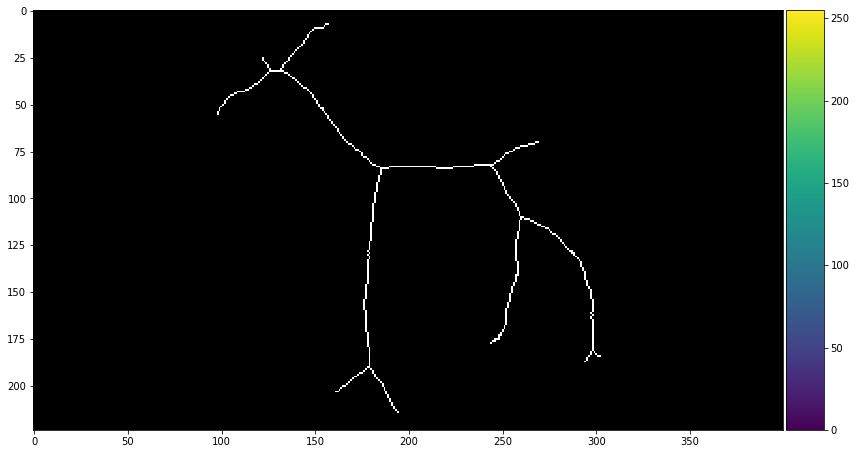

In [95]:
# Load a random image from the images folder
image = skimage.io.imread(skl_dir + '\\sheep\\' + skl_training['sheep'][-1])

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (640, 425, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



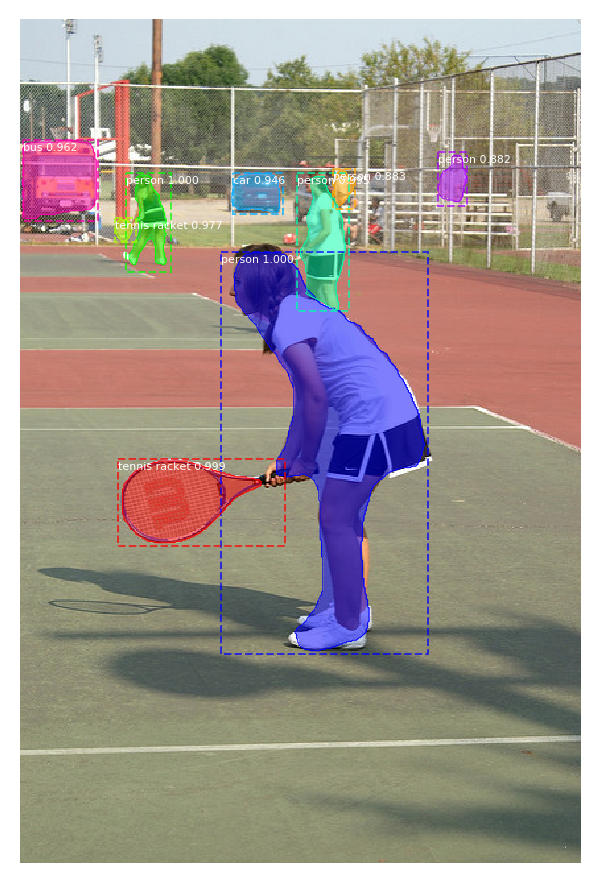

In [17]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [18]:
#differentiates the masks
mask = r['masks']
mask = mask.astype(int)
mask.shape

(640, 425, 9)

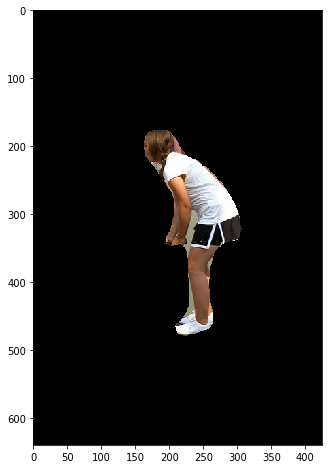

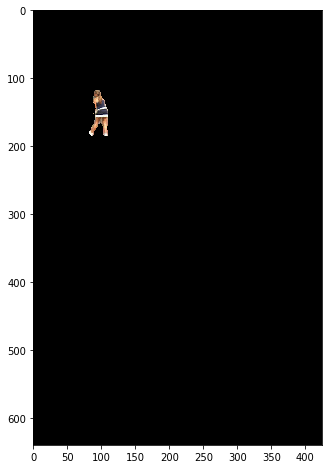

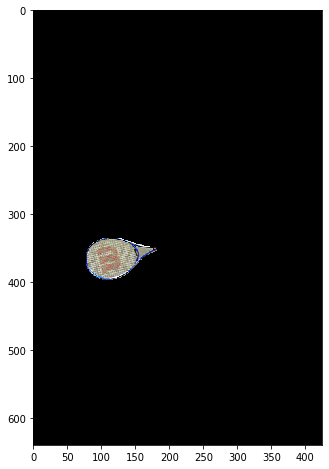

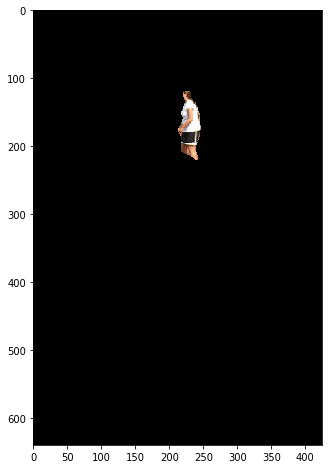

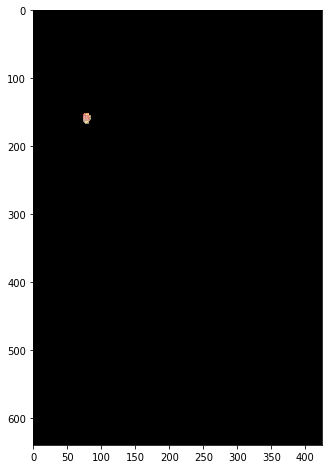

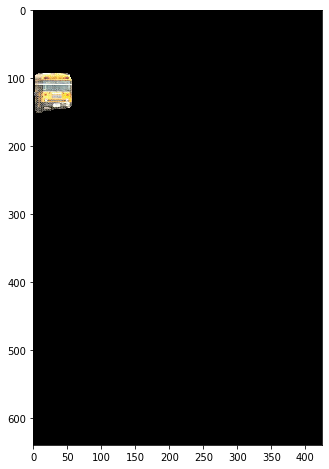

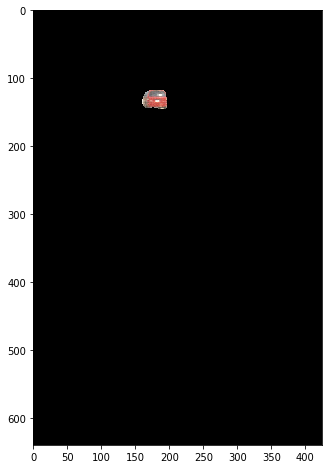

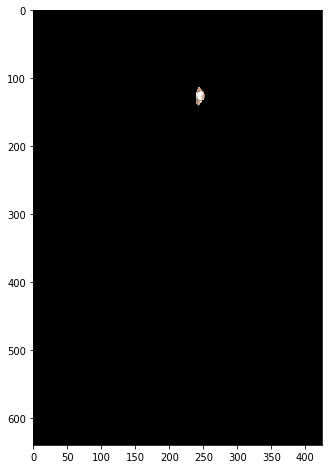

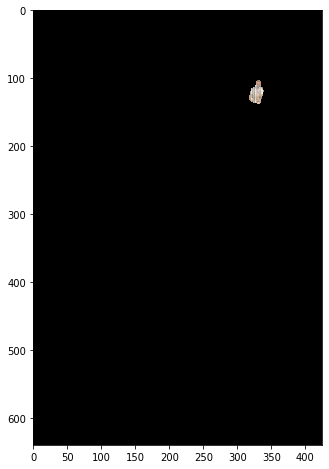

In [19]:
for i in range(mask.shape[2]):
    temp = skimage.io.imread('3862500489_6fd195d183_z.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

In [20]:
import tensorflow as tf 
print(tf.__version__)

1.14.0


In [21]:
import keras as k
print(k.__version__)

2.3.1
